In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# No longer exist, so ChatGPT created the data for me
# from faraway.datasets import galapagos 

In [2]:
# Recreate the 'galapagos' dataset

data = {
    'Species': [58, 31, 3, 25, 2, 24, 11, 15, 9, 8, 2, 17, 10, 16, 24, 21, 21, 27, 15, 11, 14, 14, 28, 23, 26, 8, 8, 24, 2, 8],
    'Area': [25.1, 1.2, 0.1, 0.6, 0.1, 1.9, 0.5, 0.3, 0.1, 0.2, 0.1, 1.0, 0.3, 0.7, 0.6, 0.9, 1.1, 2.6, 1.0, 0.4, 0.6, 0.6, 2.5, 1.9, 2.8, 0.3, 0.2, 2.6, 0.1, 0.2],
    'Elevation': [346, 183, 109, 137, 114, 137, 110, 99, 46, 47, 61, 132, 113, 137, 130, 132, 125, 140, 122, 120, 118, 121, 132, 120, 135, 110, 106, 133, 98, 115],
    'Nearest': [1.1, 0.6, 1.5, 0.6, 1.6, 0.6, 0.6, 1.3, 0.7, 0.4, 0.2, 0.6, 1.0, 0.5, 0.7, 0.5, 0.5, 1.3, 0.8, 0.9, 0.7, 1.0, 0.9, 0.7, 0.6, 1.3, 1.1, 0.6, 0.5, 1.3],
    'Scruz': [0.6, 1.1, 2.8, 1.2, 3.4, 1.3, 1.2, 2.0, 1.6, 1.2, 0.9, 1.0, 1.8, 1.0, 1.3, 1.0, 1.1, 1.9, 1.2, 1.4, 1.4, 1.6, 1.7, 1.3, 1.8, 2.0, 1.9, 1.1, 1.6, 2.1],
    'Adjacent': [1.0, 0.9, 0.8, 0.9, 0.9, 0.8, 0.7, 0.8, 0.8, 0.7, 0.6, 0.8, 0.8, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.8, 0.9, 0.9, 0.8, 0.9, 0.7, 0.7, 0.9, 0.6, 0.8]
}

galapagos = pd.DataFrame(data)
data = galapagos
galapagos.head()


,Species,Area,Elevation,Nearest,Scruz,Adjacent
0,58,25.1,346,1.1,0.6,1.0
1,31,1.2,183,0.6,1.1,0.9
2,3,0.1,109,1.5,2.8,0.8
3,25,0.6,137,0.6,1.2,0.9
4,2,0.1,114,1.6,3.4,0.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    30 non-null     int64  
 1   Area       30 non-null     float64
 2   Elevation  30 non-null     int64  
 3   Nearest    30 non-null     float64
 4   Scruz      30 non-null     float64
 5   Adjacent   30 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.5 KB


In [4]:
data.dtypes

Species        int64
Area         float64
Elevation      int64
Nearest      float64
Scruz        float64
Adjacent     float64
dtype: object

In [5]:
#Check nulls
data.isnull().sum()

Species      0
Area         0
Elevation    0
Nearest      0
Scruz        0
Adjacent     0
dtype: int64

In [6]:
# Define Variables

X = data[['Area']]  # Independent variable (Area of the island) -- Returns a Pandas DataFrame (2D).
y = data['Species']  # Dependent variable (Number of species) -- Returns a Pandas DataFrame (1D).

X: Should have two dimensions (e.g., (n, 1)), where n is the number of data points. This is because sklearn's LinearRegression expects a 2D array for the independent variable.

y: Should have one dimension (e.g., (n,)), corresponding to the number of data points.

In [7]:
X.tail()

,Area
25,0.3
26,0.2
27,2.6
28,0.1
29,0.2


In [8]:
y.shape

(30,)

In [9]:
X.shape

(30, 1)

In [10]:
# Add constant term to X and the constant will be a column of "1" / it will be used to fit the model in python
X = sm.add_constant(X)

# Inspect the first few rows of X to verify the constant column was added
print(X.head())

# Check the dimensions of X to ensure an additional column was added
print(f"X shape: {X.shape}")

   const  Area
0    1.0  25.1
1    1.0   1.2
2    1.0   0.1
3    1.0   0.6
4    1.0   0.1
X shape: (30, 2)


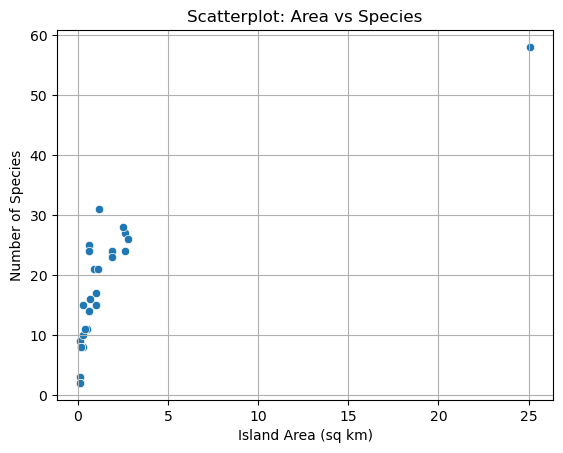

In [11]:
# Create scatterplot
sns.scatterplot(x=data['Area'], y=data['Species'])
plt.title('Scatterplot: Area vs Species')
plt.xlabel('Island Area (sq km)')
plt.ylabel('Number of Species')
plt.grid(True)
plt.show()

### Fit the regression model

In [12]:
model = sm.OLS(y, X).fit()

# Get regression coefficients
b0 = model.params['const']  # Intercept
b1 = model.params['Area']  # Slope

# Compute the correlation coefficient
r = np.corrcoef(data['Area'], data['Species'])[0, 1]


# Print the regression line equation and correlation coefficient
print(f"Regression Line: y = {b0:.2f} + {b1:.2f}x")
print(f"Correlation Coefficient (r): {r:.2f}")

Regression Line: y = 13.49 + 1.98x
Correlation Coefficient (r): 0.77


In [13]:
# Print the model summary for additional details
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     41.36
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           5.78e-07
Time:                        11:08:07   Log-Likelihood:                -101.84
No. Observations:                  30   AIC:                             207.7
Df Residuals:                      28   BIC:                             210.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4937      1.458      9.253      0.000      10.506      16.481
Area           1.9800      0.308      6.431      0.000       1.349       2.611
==============================================================================
Omnibus:                        1.790   Durbin-Watson:                   2.368
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.095
Skew:                           0.081   Prob(JB):                        0.578
Kurtosis:                       2.078   Cond. No.                         5.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

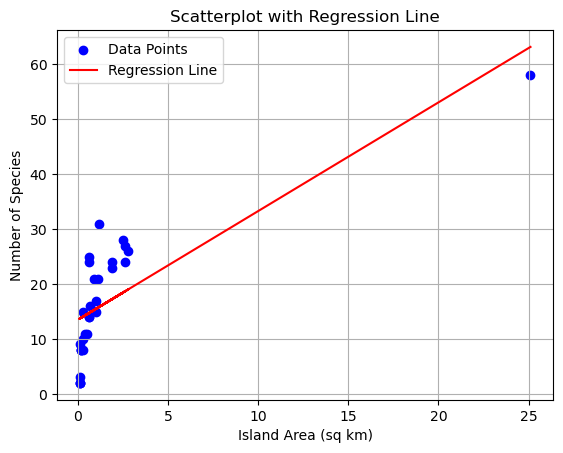

In [14]:
# Generate predicted values
y_pred = model.predict(X)

# Plot scatterplot with regression line
plt.scatter(data['Area'], data['Species'], color='blue', label='Data Points')
plt.plot(data['Area'], y_pred, color='red', label='Regression Line')
plt.title('Scatterplot with Regression Line')
plt.xlabel('Island Area (sq km)')
plt.ylabel('Number of Species')
plt.legend()
plt.grid(True)
plt.show()

# Module 2

In [15]:
# Using statsmodels

# Extract r-squared
r_squared = model.rsquared


# Using numpy

# Predicted values
y_pred = model.predict(X)

# Compute r-squared manually
# Total sum of squares
ss_total = np.sum((y - np.mean(y)) ** 2)
# Residual sum of squares 
ss_residual = np.sum((y - y_pred) ** 2)

r_squared_manual = 1 - (ss_residual / ss_total)

In [16]:
r_squared_manual

0.5963068397829343

In [17]:
r_squared

0.5963068397829343

In [19]:
# Compute residuals
residuals = model.resid
residuals

0     -5.192478
1     15.130282
2    -10.691683
3     10.318301
4    -11.691683
5      6.744260
6     -3.483696
7      0.912311
8     -4.691683
9     -5.889686
10   -11.691683
11     1.526289
12    -4.087689
13     1.120298
14     9.318301
15     5.724292
16     5.328285
17     8.358238
18    -0.473711
19    -3.285692
20    -0.681699
21    -0.681699
22     9.556241
23     5.744260
24     6.962231
25    -6.087689
26    -5.889686
27     5.358238
28   -11.691683
29    -5.889686
dtype: float64

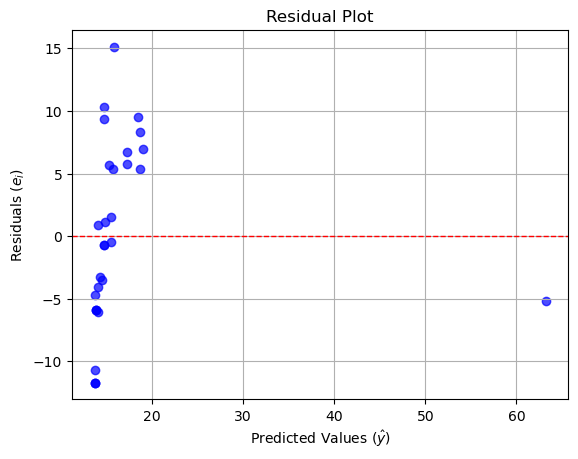

In [20]:
# Residual plot
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Predicted Values ($\hat{y}$)')
plt.ylabel('Residuals ($e_i$)')
plt.grid(True)
plt.show()

## Example 2

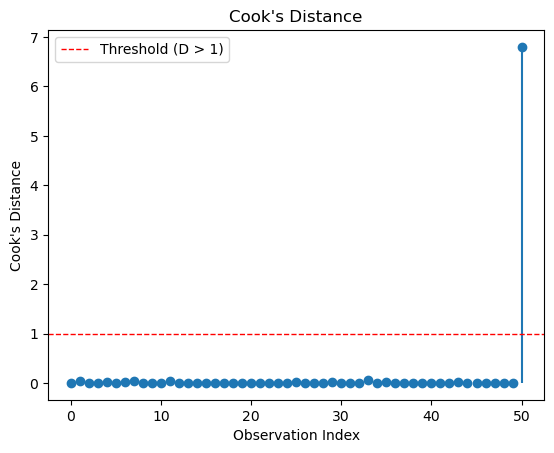

Influential Points: [50]


In [21]:
# Generate example data
np.random.seed(42)
x = np.random.rand(50) * 100  # Independent variable
y = 2.5 * x + np.random.normal(size=50, scale=10)  # Dependent variable

# Add an influential point
x = np.append(x, 150)  # High leverage
y = np.append(y, 50)   # Low y value relative to x

# Fit the regression model
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Compute Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.axhline(1, color='red', linestyle='--', linewidth=1, label="Threshold (D > 1)")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# Print influential points
influential_points = np.where(cooks_d > 1)[0]
print(f"Influential Points: {influential_points}")